Notebook that will recreate Fig. 3 (distributions of $|\Delta V|/\sigma_{\Delta V}$ and $|\Delta V|/V_{min}$) in the EDR TF paper.

In [4]:
import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

# Data

In [12]:
hdul = fits.open('fig3_data.fits')

pull = hdul['PULL'].data
Vmin = hdul['VMIN_NORM'].data

hdul.close()

In [14]:
# Recreate bin edges
pull_bins = np.zeros(len(pull['BIN_EDGE']) + 1)
pull_bins[:-1] = pull['BIN_EDGE']
pull_bins[-1] = pull['BIN_EDGE'][-1] + (pull['BIN_EDGE'][1] - pull['BIN_EDGE'][0])

Vmin_bins = np.zeros(len(Vmin['BIN_EDGE']) + 1)
Vmin_bins[:-1] = Vmin['BIN_EDGE']
Vmin_bins[-1] = Vmin['BIN_EDGE'][-1] + (Vmin['BIN_EDGE'][1] - Vmin['BIN_EDGE'][0])

# Plot

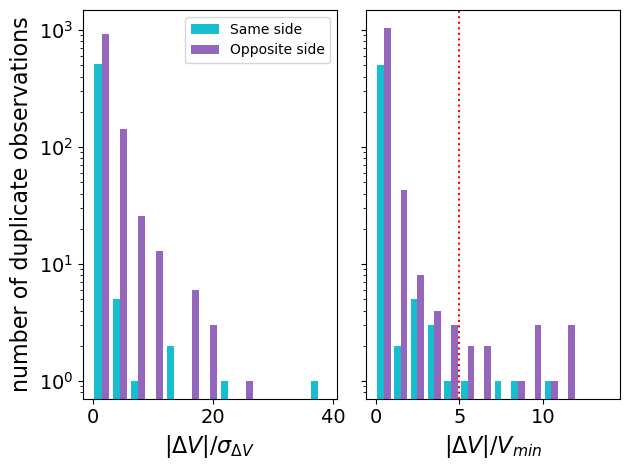

In [16]:
plt.figure(tight_layout=True)


ax1 = plt.subplot(121)
plt.hist([pull['BIN_EDGE'], pull['BIN_EDGE']], 
         pull_bins, 
         weights=[pull['N_SAME'], pull['N_OPPOSITE']], 
         color=['tab:cyan', 'tab:purple'],
         label=['Same side', 'Opposite side'])
plt.xlabel('$|\Delta V| / \sigma_{\Delta V}$', fontsize=16)

plt.legend()

plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('number of duplicate observations', fontsize=16)


ax2 = plt.subplot(122, sharey=ax1)
plt.hist([Vmin['BIN_EDGE'], Vmin['BIN_EDGE']], 
         Vmin_bins, 
         weights=[Vmin['N_SAME'], Vmin['N_OPPOSITE']], 
         color=['tab:cyan', 'tab:purple'])
plt.vlines(5, 0, 4000, colors='r', linestyles='dotted')

plt.tick_params('x', which='major', labelsize=14)
plt.tick_params('y', labelleft=False)
plt.xlabel('$|\Delta V| / V_{min}$', fontsize=16);